### Last name: Khabanonda
### First name: Yanisa
### Student number: 1003883005
### List of collaborators (if any): 
* Last name, first name
* Last name, first name
* Last name, first name

In this exercise prepared by me (Mohannad Shehadeh), we'll be empirically studying a technique often referred to as principal component analysis (PCA) and some related things.

Use ```using Pkg``` followed by ```Pkg.add()``` as used in Numerical Exercise 0 to install any of the following packages if any of them is not installed already. (If the next cell runs without error, they're installed.)

In [1]:
using Plots
using LinearAlgebra
using DelimitedFiles
using Statistics
using Random

# Part 1: A simple exercise and some preliminaries

Upper and lower-triangular systems of equations can be solved by very simple algorithms described on page 207 of your textbook. 

We randomly generate a vector:

In [2]:
x_ref = rand(10,1)

10×1 Array{Float64,2}:
 0.2989640944244245 
 0.8068831218284453 
 0.1030475988602717 
 0.19834365742965487
 0.12130028289410744
 0.43702386676483096
 0.08864193844987955
 0.35430302382874057
 0.9192751464983016 
 0.9681438701537957 

We randomly generate a lower-triangular matrix:

In [3]:
A = [rand()*(j <= i) for i in 1:10, j in 1:10]

10×10 Array{Float64,2}:
 0.938524  0.0        0.0        0.0        …  0.0       0.0       0.0     
 0.300246  0.430074   0.0        0.0           0.0       0.0       0.0     
 0.423768  0.724553   0.963734   0.0           0.0       0.0       0.0     
 0.233586  0.0791752  0.0725049  0.260445      0.0       0.0       0.0     
 0.304985  0.0186165  0.089476   0.0148331     0.0       0.0       0.0     
 0.635694  0.0145113  0.297478   0.420316   …  0.0       0.0       0.0     
 0.702538  0.0779437  0.0365875  0.503119      0.0       0.0       0.0     
 0.189346  0.736029   0.33673    0.668166      0.770117  0.0       0.0     
 0.238531  0.511962   0.187075   0.352824      0.282537  0.523028  0.0     
 0.328134  0.0836965  0.582216   0.39162       0.759566  0.137775  0.986163

It will be invertible with high probability:

In [4]:
rank(A)

10

In [5]:
y = A*x_ref

10×1 Array{Float64,2}:
 0.2805850616374502 
 0.4367827121066298 
 0.8106313686612442 
 0.19284811158920367
 0.19383863479629965
 0.4983838699662801 
 0.7855726333827616 
 1.4989555421727765 
 1.595714332803489  
 1.9755453673393415 

**Exercise:** Implement the forward substitution algorithm described on page 207 of your textbook and use it to solve the system $y = A x$ for $x$ with the $A$ and $y$ being the ```A``` and ```y``` just randomly defined. Store your answer in a variable called ```x``` which you can compare to the correct answer ```x_ref```.

In [13]:
# BEGIN SOLUTION
x = y/A[1,1]
for i=2:10
    s = y[i]
    for j=1:i-1
        s = s - A[i,j]*x[j]
    end
    x[i] = s/A[i,i]
end


In [14]:
norm(x-x_ref)

5.922092897556705e-16

In [15]:
@assert norm(x-x_ref) < 10^-8

We'll now discuss some properties of a certain kind of Hermitian matrix. Some, you might have seen in class, others, not yet. Regardless, we will only investigate these empirically in this exercise so don't fret! 

- A Hermitian matrix $A$ is a square matrix satisfying $A = A^H$ where $H$ denotes the Hermitian transpose. If the entries of the matrix are real, then $A^H = A^T$ so any real symmetric matrix, one where $A = A^T$, is also Hermitian. 
- In other words, Hermitians and transposes are the same thing when working with real matrices, and anything I claim to be true for Hermitian matrices is automatically true for real symmetric matrices because every real symmetric matrix is Hermitian
- As with the transpose, $(A^H)^H = A$ and $(AB)^H = B^HA^H$
- Observe that matrices of the form $A = BB^H$ are Hermitian because $A^H = (BB^H)^H = (B^H)^H B^H = BB^H = A$. The same thing applies to matrices of the form $A = B^HB$
- $B$ can be a wide or tall rectangular matrix 
- Hermitian matrices have some very strong properties, and Hermitian matrices that can be written as $BB^H$ have some even stronger properties
- We will illustrate just some of these properties by examples and without proofs, but you will learn why these are true later in class

We generate a Hermitian matrix of the form $BB^H$. Note that ```im``` denotes the imaginary unit in Julia and recall that ```'``` yields the Hermitian transpose. 

In [16]:
B = rand(3,3) + im*rand(3,3)
A = B*B'

3×3 Array{Complex{Float64},2}:
 2.24913+0.0im       2.00586-0.393848im  1.32261-0.185811im
 2.00586+0.393848im  2.86123+0.0im       1.62981-0.286714im
 1.32261+0.185811im  1.62981+0.286714im  1.32907+0.0im     

Observe that the diagonal elements of the matrix above must be real since they must be equal to their own complex conjugates because diagonal elements are not changed by transposing. 

In [17]:
A-A' # Zeros because A == A' 

3×3 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im

We now obtain its eigenvalues and eigenvectors:

In [18]:
eig = eigen(A)

Eigen{Complex{Float64},Float64,Array{Complex{Float64},2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 0.1499804753954504
 0.6335113240580079
 5.655937864860833 
eigenvectors:
3×3 Array{Complex{Float64},2}:
  0.214103+0.355403im   -0.176907+0.676977im  -0.563781+0.14285im  
  0.346353-0.373752im  -0.0783968-0.515414im  -0.681105+0.0681699im
 -0.753789-0.0im         0.488475+0.0im       -0.439538-0.0im      

Observe that the eigenvalues are real. This turns out to be true for any Hermitian matrix, so we can always talk about ordering the eigenvalues of a Hermitian matrix. 

In [19]:
W = eig.vectors

3×3 Array{Complex{Float64},2}:
  0.214103+0.355403im   -0.176907+0.676977im  -0.563781+0.14285im  
  0.346353-0.373752im  -0.0783968-0.515414im  -0.681105+0.0681699im
 -0.753789-0.0im         0.488475+0.0im       -0.439538-0.0im      

Moreover, the eigenvectors corresponding to distinct eigenvalues are orthogonal! Since this matrix has three distinct eigenvalues, all the eigenvectors are pairwise orthogonal.

In [20]:
W'*W

3×3 Array{Complex{Float64},2}:
         1.0+0.0im          …   1.66533e-16+8.32667e-17im
 5.55112e-17-1.38778e-16im     -5.55112e-17+5.55112e-17im
 1.66533e-16-8.32667e-17im              1.0+0.0im        

In case you can't see all the entries above due to the space on your screen, let's do a quick little check by summing all the entries of the matrix and this should be just the sum of the diagonal entries of an identity matrix since the other components are zero (or very close to zero):

In [21]:
sum(W'*W) # Should be three

3.0 + 0.0im

A Hermitian matrix need not have all the eigenvalues be distinct, but for this one which we randomly generated, it's highly unlikely to have repeated eigenvalues.

Let's generate one where we force it to have some repeated eigenvalues:

In [22]:
A = W*[1 0 0; 0 1 0; 0 0 2]*W'

3×3 Array{Complex{Float64},2}:
  1.33825+0.0im        0.393732-0.0588629im  0.247803-0.062788im 
 0.393732+0.0588629im   1.46855+0.0im        0.299372-0.0299633im
 0.247803+0.062788im   0.299372+0.0299633im   1.19319+0.0im      

In [23]:
eig = eigen(A)

Eigen{Complex{Float64},Float64,Array{Complex{Float64},2},Array{Float64,1}}
eigenvalues:
3-element Array{Float64,1}:
 1.0000000000000002
 1.0000000000000009
 1.9999999999999982
eigenvectors:
3×3 Array{Complex{Float64},2}:
 -0.380892-0.0125502im  -0.552482-0.459645im  -0.563781+0.14285im  
 -0.246146+0.11491im     0.509212+0.445376im  -0.681105+0.0681699im
  0.883726+0.0im         -0.16073-0.0im       -0.439538-0.0im      

In [24]:
W = eig.vectors

3×3 Array{Complex{Float64},2}:
 -0.380892-0.0125502im  -0.552482-0.459645im  -0.563781+0.14285im  
 -0.246146+0.11491im     0.509212+0.445376im  -0.681105+0.0681699im
  0.883726+0.0im         -0.16073-0.0im       -0.439538-0.0im      

In [25]:
W*W'

3×3 Array{Complex{Float64},2}:
         1.0+0.0im          …  1.38778e-16-2.77556e-17im
 1.66533e-16-2.08167e-17im     1.11022e-16-1.73472e-17im
 1.38778e-16+2.77556e-17im             1.0+0.0im        

In [26]:
sum(W*W')

3.0000000000000018 + 0.0im

The eigenvectors are still orthogonal! But this doesn't mean that any two linearly independent eigenvectors corresponding to the eigenvalue $1$ are orthogonal. What it means is that the eigenspace corresponding to the eigenvalue $1$ is two-dimensional and we can find a pair of orthonormal vectors corresponding to the eigenvalue $1$ which is what Julia chooses to give us. 

This last fact is not very important for this exercise in particular so don't worry if it's not clear because it will be covered in class soon.

We will now discuss an important class of Hermitian matrices that can be written as $BB^H$, covariance matrices. 

What I will describe has equivalent interpretations and descriptions in the language of probability, in the language of statistics, and in the language of optimization, but I will avoid such language so that it's understandable to everyone. I will ocassionally mention technicalities in case you have studied such topics or will study them at some point in the future, but you can safely ignore these technicalities if you're just interested in completing the exercise. 

Suppose we had some collection of $N$ $M$-dimensional vectors $x \in R^{M\times1}$ each representing an example or observation of a particular kind of data. Each $M$-dimensional vector could represent, for example:
- Time-series data where the components of the vector represent a quantity evolving in time like stock price data, Google Trends popularity data, or an hourly temperature forecast, etc.
- A collection of measurements from an experiment. For example, each component of the vector could represent a different physical quantity like the density, mass, and volume of a rock. The $N$ samples would then represent the densities, masses, and volumes of $N$ different observed rocks

Let this collection of vectors $x^{(j)} \in R^{M\times 1}$ for $j = 1,2,\dots,N$ be the columns of some matrix $X \in R^{M\times N}$
$$
X = \begin{bmatrix}
x^{(1)} & x^{(2)} & \dots & x^{(N)}
\end{bmatrix}.
$$
Let $\bar{x} \in R^{M\times 1}$ be the average vector across all samples
$$
\bar{x} = \frac{1}{N}\sum_{j = 1}^N x^{(j)}.
$$
Equivalently, the components of $\bar x$ are 
$$
\bar{x}_i = \frac{1}{N}\sum_{j = 1}^N x^{(j)}_i.
$$
The sample covariance matrix is the $M \times M$ matrix $Q$ whose entries are given by 
$$
Q_{ij} = \frac{1}{N-1} \sum_{k=1}^N(x_i^{(k)} - \bar{x}_i)(x_j^{(k)} - \bar{x}_j).
$$
We can always presubtract the mean vector from all of our samples so that we get a new dataset with $\bar x = \mathbf 0$ and we can add it back if we need it so we can assume that $\bar x = \mathbf 0$ without loss of generality. In this case, $Q$ is simply given by 
$$
Q = \frac{1}{N-1} XX^T
$$

$Q_{ij}$ is the sample correlation of the $i$th and $j$th component of this vector data. 

We will be interested in the eigenvectors (or eigenspaces) of this matrix in this exercise and the constant term $\frac{1}{N-1}$ does not affect them. It only scales the eigenvalues by the same constant, so you can actually ignore it for this exercise and let 
$$
Q = XX^T.
$$

I will refer to $Q$ as the covariance matrix of the data in this exercise, however, this is **not** what a **covariance matrix** is. Strictly speaking $Q$ is equal to $N-1$ times an unbiased estimator of the covariance matrix of a random vector, but the meaning of this and the distinction is irrelevant to the exercise.  

All you need to know for this exercise is that $Q_{ij}$ is a number proportional to the correlation of  $i$th and $j$th component of the vector data under consideration, and I just mention this detail so I don't mislead you into using wrong terminology if you study this in the future. 

# Part 2: Inferring a basis from data

Consider the following collection of 100 randomly generated two-dimensional data points:

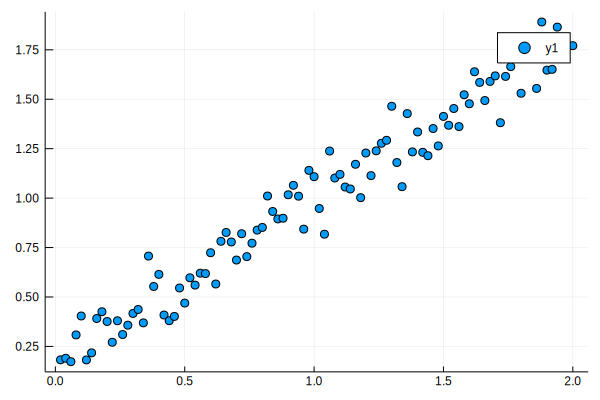

In [27]:
x = [i for i in 0.02:0.02:2]
a = 0.8
b = 0.2
y = a.*x .+ b .+ 0.1*randn(100)
scatter(x,y)

We collect them in a matrix:

In [28]:
X = [x'; y']

2×100 Array{Float64,2}:
 0.02      0.04      0.06      …  1.94     1.96     1.98     2.0    
 0.182262  0.190076  0.172819     1.86491  1.74703  1.76751  1.77094

We compute the mean vector as described earlier:

In [29]:
m = mean(X, dims = 2) # Computes the mean across the columns (along the rows)

2×1 Array{Float64,2}:
 1.01              
 1.0042102529628778

We replace the data by a version with the mean subtracted.

The following operation, subtraction of a column vector from a matrix, is interpreted by Julia as subtraction of the column vector from each column of the matrix. Equivalently, it subtracts from the matrix a matrix where all the columns are this column vector replicated. 

In [30]:
X = X .- m

2×100 Array{Float64,2}:
 -0.99      -0.97      -0.95      -0.93      …  0.95      0.97      0.99    
 -0.821948  -0.814134  -0.831392  -0.696051     0.742819  0.763304  0.766726

The mean is now zero:

In [31]:
mean(X, dims = 2)

2×1 Array{Float64,2}:
 -7.327471962526034e-17 
  1.7763568394002506e-16

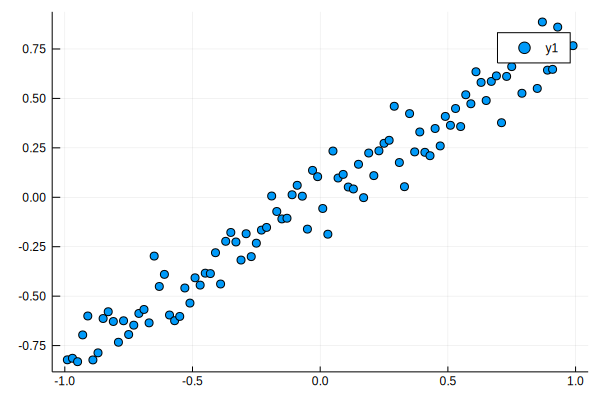

In [32]:
scatter(X[1,:],X[2,:])

While this data lives in a two-dimensional space, it's clearly lying very close to a line, so we may ask the question, what $K$-dimensional subspace ($K = 1$ in this case) can I project the data onto to give me the best $K$-dimensional approximation of the data in some sense?

The answer turns out to be that this is the eigenspace corresponding to the $K$ largest eigenvalues of the covariance matrix. I.e., we project onto the the span of the eigenvectors corresponding to the $K$ largest eigenvalues. 

Equivalently, we can ask the question of which subspaces capture most of the variation in the data, and the answer turns out to be that they are the ones corresponding to the largest eigenvalues of the covariance matrix.

In [33]:
eig = eigen(X*X')

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
eigenvalues:
2-element Array{Float64,1}:
  0.552492088377111
 55.90346576579307 
eigenvectors:
2×2 Array{Float64,2}:
  0.638611  -0.76953 
 -0.76953   -0.638611

In [34]:
W = eig.vectors

2×2 Array{Float64,2}:
  0.638611  -0.76953 
 -0.76953   -0.638611

In [35]:
W*W'

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

Let's obtain the eigenvector corresponding to the largest eigenvalue and plot it alongside the data:

In [36]:
u = eig.vectors[:,argmax(eig.values)]

2-element Array{Float64,1}:
 -0.769529605885536 
 -0.6386111380688967

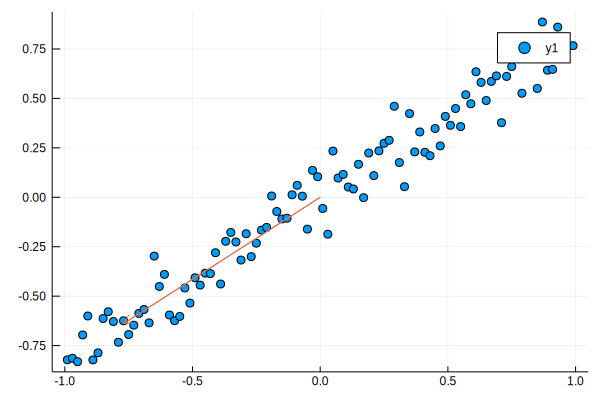

In [37]:
scatter(X[1,:],X[2,:])
quiver!([0],[0],quiver=([u[1]],[u[2]]))

As we expect, this eigenspace is the line along which the data is most spread out. 

Since eigenvectors corresponding to distinct eigenvalues are orthogonal, projection is easy, we can obtain a matrix $W$ whose columns are an orthonormal basis for the subspace we'd like to project onto. In this case, there's just one basis vector, everything done would work if we had more basis vectors.

In [38]:
W = u

2-element Array{Float64,1}:
 -0.769529605885536 
 -0.6386111380688967

We would like to compute the projection coefficients for all data points. Noting that

$$
\begin{bmatrix}
W^T x^{(1)} & W^T x^{(2)} & \dots & W^T x^{(N)}
\end{bmatrix} = W^T X
$$

we compute them as follows

In [39]:
A = W'*X

1×100 Adjoint{Float64,Array{Float64,1}}:
 1.28674  1.26636  1.26199  1.16017  1.08362  …  -1.20543  -1.2339  -1.25147

By the same kind of argument, we obtain the projections of all data points as a matrix $V$ as follows:

In [40]:
V = W*A

2×100 Array{Float64,2}:
 -0.990184  -0.974501  -0.971138  -0.892784  …  0.927611  0.949521  0.963047
 -0.821726  -0.808711  -0.80592   -0.740897     0.769798  0.787981  0.799205

Let's add the means back, both to the data, and to the projection:

In [41]:
X = X .+ m
V = V .+ m

2×100 Array{Float64,2}:
 0.0198157  0.0354993  0.0388621  …  1.9837   1.93761  1.95952  1.97305
 0.182484   0.195499   0.19829       1.81225  1.77401  1.79219  1.80342

This is a crucial step!

The following will plot the data and its one-dimensional approximation:

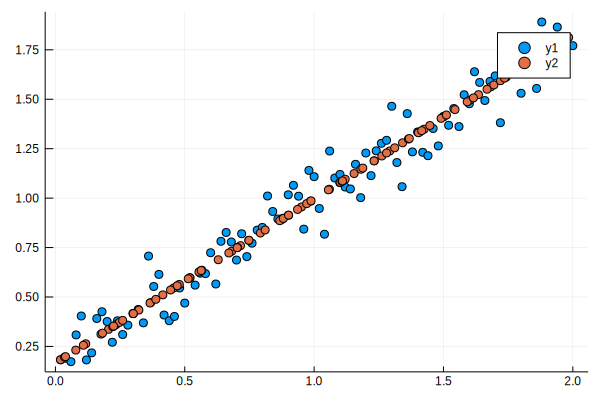

In [42]:
scatter(X[1,:],X[2,:])
scatter!(V[1,:],V[2,:])

We now revisit our Taylor Swift popularity data:

In [173]:
TS = readdlm("TaylorSwift.csv", ',', '\n')
y = TS[:,2]
y = convert(Array{Float64,1}, y)

154-element Array{Float64,1}:
  5.0
  5.0
  5.0
  5.0
  6.0
  7.0
  7.0
  7.0
  6.0
  6.0
  7.0
 10.0
 12.0
  ⋮  
 22.0
 16.0
 16.0
 18.0
 14.0
 14.0
 23.0
 22.0
 24.0
 24.0
 35.0
 23.0

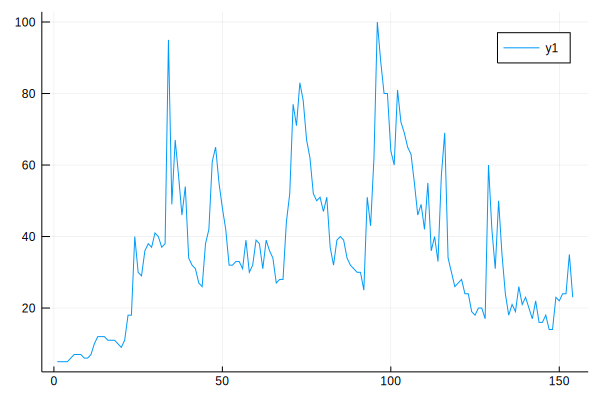

In [174]:
plot(y)

(the data has been truncated a bit)

We would like to obtain some basis for a $24$-dimensional approximation of the Taylor Swift data by analyzing similar popularity data from other artists and bands. Data vectors for the following 30 artists/bands were obtained from Google Trends:

Katy Perry, Ariana Grande, Miley Cyrus, Beyoncé, Lady Gaga, Nicki Minaj, Drake, Adele, Sam Smith, Post Malone, Khalid,  Billie Eilish, Lizzo, Shawn Mendes, Lorde, Ed Sheeran, Maroon 5, Imagine Dragons, The Weeknd, Kendrick Lamar, Carly Rae Jepsen, Kelly Clarkson, Avril Lavigne, Bruno Mars, One Direction, Alicia Keys, Mariah Carey, Kanye West, Coldplay, and Fergie.

In [175]:
Artists = readdlm("Artists.csv", ',', '\n')
Artists = convert(Array{Float64,2}, Artists)

154×30 Array{Float64,2}:
 0.0   0.0   4.0  23.0   0.0   0.0  …  0.0   4.0  18.0   4.0  15.0  27.0
 0.0   0.0   5.0  20.0   0.0   0.0     0.0   5.0  12.0   4.0  13.0  22.0
 0.0   0.0   4.0  21.0   0.0   0.0     0.0   4.0  16.0   4.0  14.0  23.0
 0.0   0.0   4.0  24.0   0.0   0.0     0.0   4.0  11.0   4.0  11.0  25.0
 0.0   0.0   5.0  23.0   0.0   0.0     0.0   3.0  10.0   4.0  10.0  26.0
 0.0   0.0   4.0  21.0   0.0   0.0  …  0.0   3.0   9.0   5.0  10.0  23.0
 0.0   0.0   8.0  18.0   0.0   0.0     0.0   4.0  10.0   8.0  10.0  27.0
 0.0   0.0  12.0  21.0   0.0   0.0     0.0   4.0  10.0  16.0  10.0  29.0
 0.0   0.0  12.0  19.0   0.0   0.0     0.0   4.0  11.0  22.0   9.0  24.0
 0.0   0.0  11.0  13.0   0.0   0.0     0.0  10.0  10.0  56.0  10.0  20.0
 0.0   0.0   9.0  12.0   0.0   0.0  …  0.0  16.0  10.0  24.0   9.0  17.0
 0.0   0.0  10.0  12.0   0.0   0.0     0.0  33.0  11.0  32.0   9.0  17.0
 0.0   0.0  14.0  14.0   0.0   1.0     0.0  30.0  15.0  16.0   9.0  18.0
 ⋮                        

Here's what they look like:

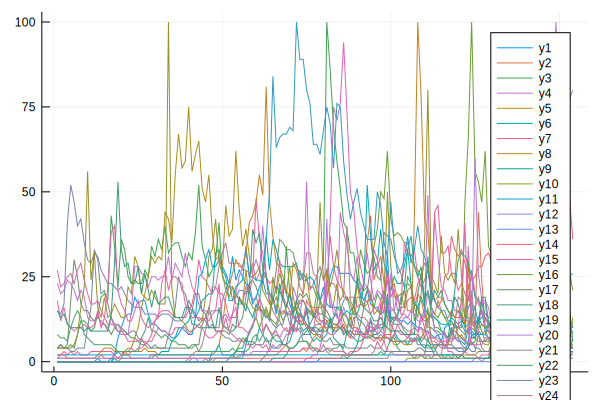

In [176]:
X_ = copy(Artists)
plot(X_)

Unfortunately, 30 examples is not a large enough amount of data and I couldn't find a way to obtain a larger amount easily, but we can improvise!

We know that the data is time-series data with bumps occuring at different points in time so similar data can be artificially created by horizontally translating the existing data. We apply random horizontal translations done in a circular way (i.e., such that horizontally shifting a bump far to the right causes it to come out of the left like Pac-Man). 

We do this five times appending this randomly shifted data to our dataset.

In [177]:
X = copy(Artists)
for i in 1:5
    X = [X circshift(X_, (rand(Int)%154,0))]
end

In [179]:
X ;

We now have 180 vectors in our collection. 

**Exercise:** Obtain a 24-dimensional approximation of the Taylor Swift data ```y``` by projection onto the subspace spanned by the eigenvectors corresponding to the 24 largest eigenvalues of the covariance matrix of the data ```X```.

You will simply need to do the following steps in this order:
- Obtain the mean of the artist data vectors ```X``` and subtract it from this data
- Also subtract this mean from the Taylor Swift vector ```y``` 
- Obtain the orthonormal basis for the subspace ```W``` 
- Project ```y``` onto this subspace to get ```y_hat```
- Add the mean to ```y_hat``` to get the final ```y_hat```
- Add the mean back to ```y``` to get back the original ```y```


In [180]:
# BEGIN SOLUTION
m = mean(X, dims = 2)
m_ = Array{Float64, 1}
X = X .- m
y = y .- m[:,1]
# ignore this gap pls, solution continues on the next box...

154-element Array{Float64,1}:
 -3.0388888888888896
 -2.9111111111111114
 -3.011111111111111 
 -3.0500000000000007
 -2.072222222222223 
 -1.5722222222222229
 -1.5               
 -1.6388888888888893
 -2.3055555555555554
 -2.655555555555555 
 -1.511111111111111 
  1.06111111111111  
  3.2555555555555546
  ⋮                 
 13.183333333333334 
  7.488888888888889 
  6.538888888888888 
  8.777777777777777 
  4.355555555555556 
  4.844444444444443 
 13.549999999999999 
 13.083333333333332 
 15.205555555555556 
 15.338888888888889 
 26.594444444444445 
 14.1               

In [200]:
eig = eigen(X*X')
W = eig.vectors
W = eig.vectors[:,131:154]
# since the eigenvectors are sorted in accending order of eigenvalues, take the last 24 eigenvalues.
# solution continues on the following box.

154×24 Array{Float64,2}:
  0.0241703     0.0780682   …  -0.147275  -0.0227336   -0.0196524 
  0.0513022     0.0715678      -0.144489  -0.0198773   -0.0209677 
  0.000940873   0.0442979      -0.137256  -0.0257976   -0.0252648 
  0.0392508    -0.0305186      -0.130101  -0.0313061   -0.0264291 
  0.0366732    -0.0403118      -0.122911  -0.0284053   -0.0286922 
  0.0756211     0.0212995   …  -0.134654  -0.0330198   -0.0278975 
  0.0540462     0.0210864      -0.131781  -0.0297236   -0.0273071 
  0.0308275     0.00797273     -0.134948  -0.0343566   -0.0295944 
  0.0183295    -0.0411721      -0.130542  -0.0346488   -0.0266198 
  0.0229874    -0.13666        -0.127422  -0.0352429   -0.0332117 
 -0.0205268    -0.0323756   …  -0.123642  -0.0375308   -0.0314859 
 -0.0795499    -0.0165637      -0.11876   -0.0497792   -0.0362349 
 -0.0652375    -0.0339723      -0.106698  -0.0509205   -0.0337648 
  ⋮                         ⋱                                     
 -0.112009      0.281924       -0.132

In [201]:
A = W'*y 
y_hat = W*A
y_hat = y_hat .+ m
y = y .+ m

154×1 Array{Float64,2}:
 21.07777777777778 
 20.822222222222223
 21.022222222222222
 21.1              
 22.144444444444446
 24.144444444444446
 24.0              
 24.27777777777778 
 22.61111111111111 
 23.31111111111111 
 24.022222222222222
 27.87777777777778 
 29.488888888888894
  ⋮                
 39.63333333333333 
 33.022222222222226
 34.922222222222224
 36.44444444444444 
 33.28888888888889 
 32.31111111111112 
 41.900000000000006
 39.833333333333336
 41.58888888888889 
 41.32222222222222 
 51.8111111111111  
 40.8              

The following code will plot your projection of the Taylor Swift data ```y_hat``` (store it in a variable called ```y_hat``` if you haven't already) and the original data ```y``` and compute the error:

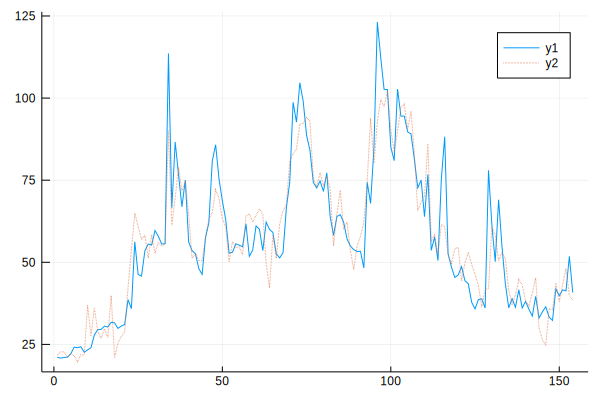

In [202]:
plot(y)
plot!(y_hat, line = (:dot))

In [129]:
norm(y-y_hat)

1.4429950266485677e-12

**Exercise**: Comment on how this compares to the basis you chose in Numerical Exercise 1. Is it better or worse? Why do you think this is the case? Note that your answer could be different than that of your peers because there was randomness involved in creating the data when we did random circular shifts. 

Answer: Compared to the basis calculated in Numerical Exercise 1, this basis is better, with a much lower norm between y and y_hat. This is probably because we have vectors were created from projections, which minimize the distance between y and y_hat. The basis created in Ex. 1 was limited in that the shape of the general 'bump' had to be maintained. Whereas this basis created by eigenvector projections should more accurately represent the space and general pattern of taylor swift's data. 

# Part 3: Classifying wheat seeds

The following data obtained from: https://archive.ics.uci.edu/ml/datasets/seeds# consists of the attributes of three types of wheat seeds: Kama, Rosa and Canadian, which we will assign the numbers 1, 2, and 3.

The following code will pre-process the data for you to have zero mean (no need to care about zeroing the mean in this part) and comparable units for each of the attributes. Moreover, the code will randomly split the data into two collections, one called ```X_TRAINING``` and another called ```X_TESTING```. 

An important remark: Once you have your final answer for this part, **don't re-run this next cell** because there is randomness in the splitting of the data and hence eigenvectors and hence your answers so your answers could become wrong.

In [229]:
Data = readdlm("seeds_dataset.txt", '\t', '\n') # Load data
X = zeros(7,210) # Data
Y = zeros(1,210) # Labels
X[1,:] = convert(Array{Float64,1}, Data[:,1]) # 7 different attributes
X[2,:] = convert(Array{Float64,1}, Data[:,2]) 
X[3,:] = convert(Array{Float64,1}, Data[:,3]) 
X[4,:] = convert(Array{Float64,1}, Data[:,4]) 
X[5,:] = convert(Array{Float64,1}, Data[:,5]) 
X[6,:] = convert(Array{Float64,1}, Data[:,6]) 
X[7,:] = convert(Array{Float64,1}, Data[:,7]) 
Y = Data[:,8] # Labels
I = randperm(210) # Random permutation of indices
I_TRAINING = I[1:160] # Training subset
I_TESTING = I[160:210] # Testing subset
X_TRAINING = X[:,I_TRAINING]
Y_TRAINING = Y[I_TRAINING]
means = mean(X_TRAINING, dims=2)[:] # Means
std_factor = [(1.0./std(X_TRAINING, dims=2)[i])*(i == j) for i = 1:7, j = 1:7] # 1 / (standard deviations)
X_TRAINING = X_TRAINING .- means # Subtract means from training data
X_TRAINING = std_factor*X_TRAINING # Standardize training data
X_TESTING = X[:,I_TESTING] 
Y_TESTING = Y[I_TESTING]
X_TESTING = X_TESTING .- means # Subtract means and standardize testing data
X_TESTING = std_factor*X_TESTING;

Each column of the following matrix contains numbers corresponding to the following attributes of a type of seed but they have been scaled and a constant vector subtracted so that they are zero mean so they aren't exactly in physically interpretable form. 

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove. 

In [230]:
X_TRAINING

7×160 Array{Float64,2}:
  1.39107   -0.959372  -0.163365    …  -0.692897  -0.928624   -1.03795  
  1.52115   -1.09284   -0.137435       -0.825327  -1.05462    -1.1922   
 -0.145169   0.307166   0.127939        0.674155   0.264493    0.315701 
  1.87845   -1.1912    -0.0948987      -1.11355   -1.11811    -1.12953  
  0.736668  -0.867981   0.00131313     -0.400506  -0.762931   -0.836466 
 -1.00491   -0.967115   0.209138    …  -0.866994  -0.0189517  -0.0414954
  2.17583   -0.712339  -0.530407       -1.64061   -1.09688    -0.555216 

The corresponding type of seed for each of the examples in the columns is given by the following:

In [231]:
Y_TRAINING

160-element Array{Float64,1}:
 2.0
 3.0
 1.0
 2.0
 3.0
 3.0
 1.0
 1.0
 1.0
 3.0
 2.0
 2.0
 1.0
 ⋮  
 2.0
 1.0
 1.0
 3.0
 1.0
 1.0
 3.0
 2.0
 1.0
 1.0
 3.0
 3.0

The data in ```X_TESTING``` and ```Y_TESTING``` is another collection containing the same kind of data.

**Exercise:** Obtain the eigenvectors of the covariance matrix of ```X_TRAINING``` corresponding to the two **smallest** eigenvalues and obtain the projection coefficients resulting from projection of the vectors in ```X_TRAINING``` onto the corresponding two-dimensional subspace. Store the result in a variable called ```feats```. ```feats``` should be a 2 by 160 matrix. 

In [232]:
# BEGIN SOLUTION
eig = eigen(X_TRAINING*X_TRAINING')
W = eig.vectors[:,1:2]
feats = W'*X_TRAINING


2×160 Array{Float64,2}:
  0.00012701   0.0195544  -0.0267183  …   0.0248881   0.0252823  0.0166264
 -0.143899    -0.0509981   0.0621284     -0.0463276  -0.0232802  0.0574761

The following code plots the projection coefficients corresponding to the different types of seeds:

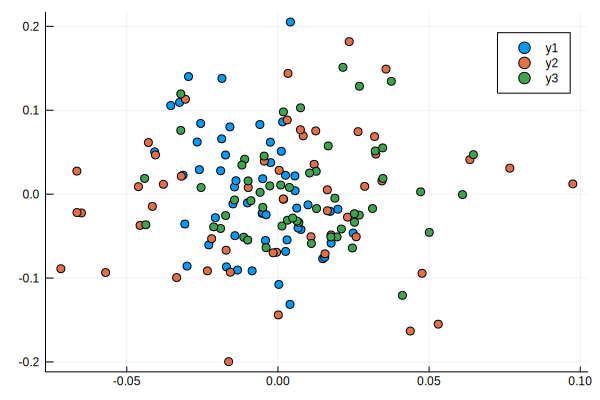

In [233]:
scatter(feats[1,Y_TRAINING .== 1],feats[2,Y_TRAINING .== 1])
scatter!(feats[1,Y_TRAINING .== 2],feats[2,Y_TRAINING .== 2])
scatter!(feats[1,Y_TRAINING .== 3],feats[2,Y_TRAINING .== 3])

**Exercise:** Obtain the eigenvectors of the covariance matrix of ```X_TRAINING``` corresponding to the two **largest** eigenvalues and obtain the projection coefficients resulting from projection of the vectors in ```X_TRAINING``` onto the corresponding two-dimensional subspace. Store the result in a variable called ```feats```. ```feats``` should be a 2 by 160 matrix. Store the two eigenvectors as the columns of a matrix called ```W``` as you will need this in the last part.

In [234]:
# BEGIN SOLUTION
eig = eigen(X_TRAINING*X_TRAINING')
W = eig.vectors[:,6:7]
feats = W'*X_TRAINING


2×160 Array{Float64,2}:
  0.529685  -1.36273  -0.135566   1.25258  …  -1.82728  -0.77075  -0.621161
 -3.31282    1.88806   0.364119  -1.25112      1.6836    2.03565   1.95514 

The following code plots the projection coefficients corresponding to the different types of seeds:

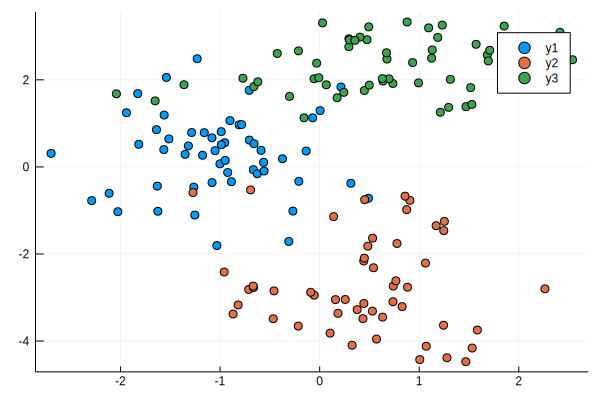

In [235]:
scatter(feats[1,Y_TRAINING .== 1],feats[2,Y_TRAINING .== 1])
scatter!(feats[1,Y_TRAINING .== 2],feats[2,Y_TRAINING .== 2])
scatter!(feats[1,Y_TRAINING .== 3],feats[2,Y_TRAINING .== 3])

**Exercise**: Comment on the difference between the two and provide your interpretation of what's going on.

Answer:The results created from the smallest eigenvectors results in a scattered looking plot with the three different seeds all over the place, where as the results using the largest eigenvectors results clusters the different types of seeds in a way where the simillar seeds are in the same general area, and separated from the other types of seeds. By projecting the data onto the larger eigenvalues, there is a more prominent distinction between the three types of seeds, since the vectors are scaled by a larger magnitude, which separates the different seeds more. 

**Exercise:** 

We would like to create a classifier that simply determines based on the projection coefficients of the seed data onto the two-dimensional subspace of the covariance matrix corresponding to the two largest eigenvalues, whether a seed is of type 3 or not. The prediction will simply be 1 if the seed is of type 3 and 0 if the seed is not of type 3, i.e., of types 1 or 2. 

We will create this classifier by simply trying to find a line that separates the type 3 seed from the other seeds. 

All you have to do for this exercise is play around with 3 parameters to obtain this line and run the following two cells until you get a classification accuracy of 85% or higher on the testing data. 

The first two parameters you can change are ```a``` and ```b``` which are just the slope and vertical shift of the line. And the third parameter is the ```>``` which you can choose as ```>``` or ```<``` and this corresponds to whether the classification is yes/1/(type 3) or no/0/(types 1 or 2) for data points above or below the line. 

Note that the answer for all three of these will change if you re-run the cell which loads and processes the data because it randomly partitions the data so don't re-run after you have a good answer. 

Note further that the classification accuracy is computed on a different set of data than the data being currently visualized. 

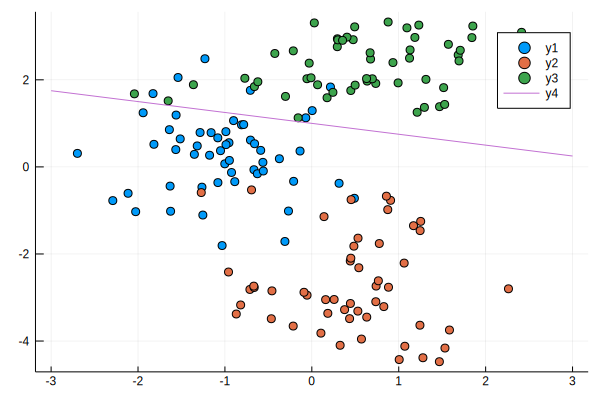

In [243]:
scatter(feats[1,Y_TRAINING .== 1],feats[2,Y_TRAINING .== 1])
scatter!(feats[1,Y_TRAINING .== 2],feats[2,Y_TRAINING .== 2])
scatter!(feats[1,Y_TRAINING .== 3],feats[2,Y_TRAINING .== 3])

x = [i for i = -3:0.1:3]
a = -0.25
b = 1
y = a*x .+ b
plot!(x,y)

In [245]:
V = W'*X_TESTING # Obtain projection coefficients for test data

predictions = [V[2,i] > a*V[1,i]+b ? 1 : 0 for i in 1:size(X_TESTING)[2]] 

truths = 1*(Y_TESTING .== 3)

accuracy = sum(predictions .== truths)/length(predictions)*100

88.23529411764706

In [246]:
@assert accuracy > 85

Surely you can't do this by hand for higher dimensional data since a two-dimensional subspace might not be enough to discriminate. And as you might have guessed, there is a way to find this line, or more generally, hyperplane which best separates the classes and that will be the topic of a future exercise. 